# Import Libraries and Modules

In [52]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb 


In [53]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential 


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings 

# Loading the Dataset

In [66]:
try : 
    df = pd.read_csv('/usercode/car_purchasing.csv', encoding='ISO-8859-1')
    print( df.describe(include = 'all'))
    print("_First five rows of the dataset")
    print(df.head())
except :
    print("File not found")

       customer name                                    customer e-mail  \
count            500                                                500   
unique           498                                                500   
top             Seth  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
freq               2                                                  1   
mean             NaN                                                NaN   
std              NaN                                                NaN   
min              NaN                                                NaN   
25%              NaN                                                NaN   
50%              NaN                                                NaN   
75%              NaN                                                NaN   
max              NaN                                                NaN   

       country      gender         age  annual Salary  credit card debt  \
count      500  500.0000

# Visualization 

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


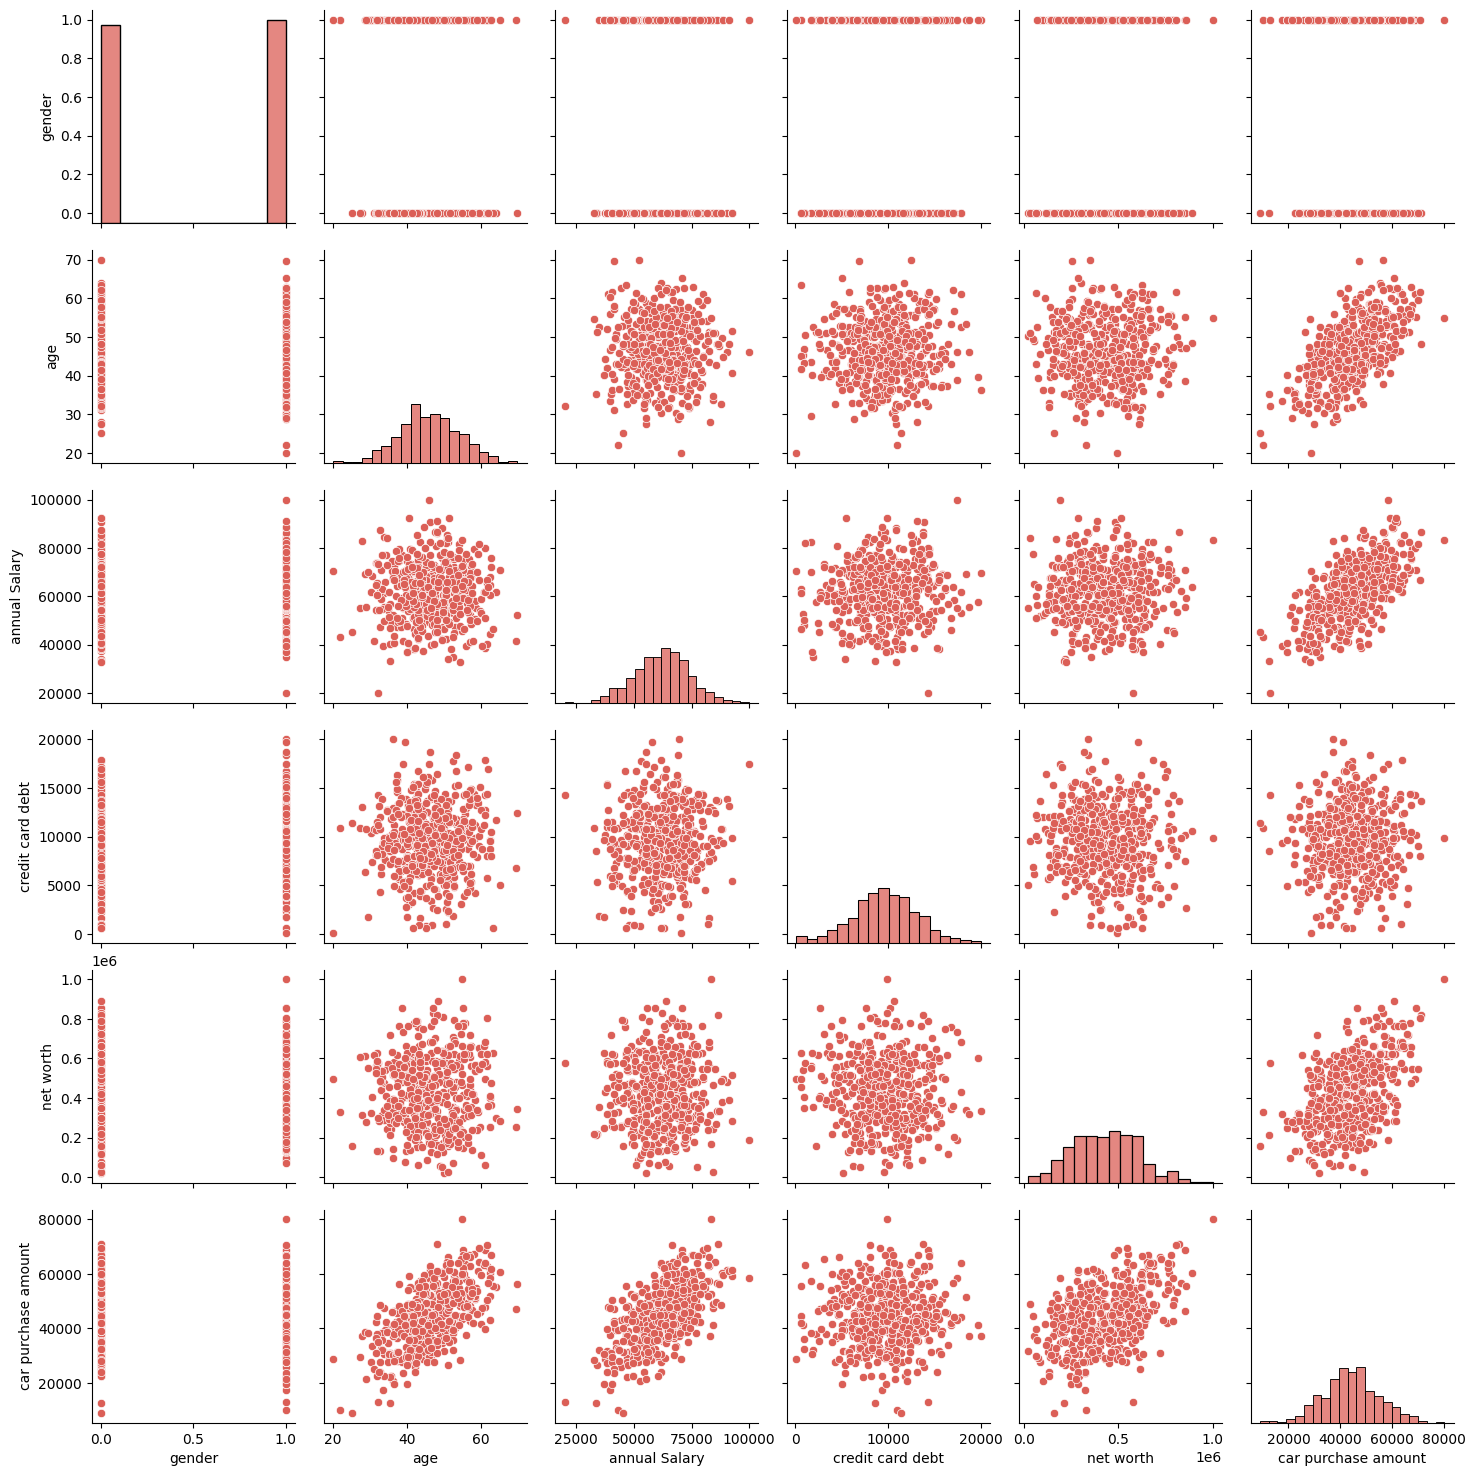

In [56]:
sb.pairplot(df )

### Plot to View Purchasing Amount and Net Worth

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


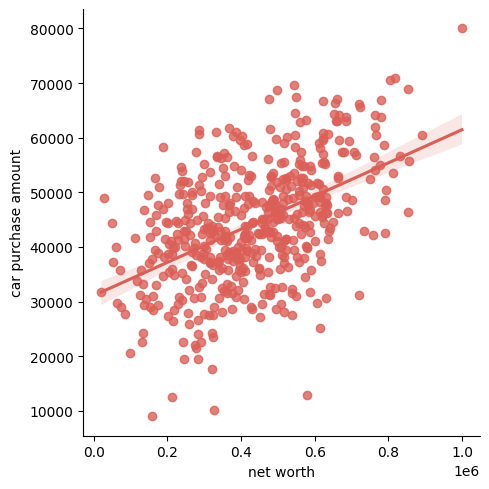

In [57]:
sb.set_palette('hls')
sb.lmplot(x = 'net worth', y = 'car purchase amount', data = df)

### Plot between Purchasing Amount and Age

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Purchase Amount vs Age hue gender')

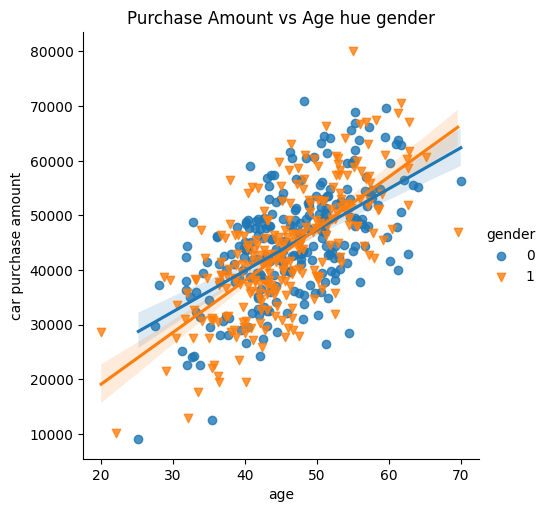

In [58]:
sb.lmplot(x= 'age' , y = 'car purchase amount' , data = df , hue = 'gender' , markers = ['o' , 'v'] , palette = 'tab10')
plt.title('Purchase Amount vs Age hue gender')

### Task 6: Create Plots for Comparative Analysis

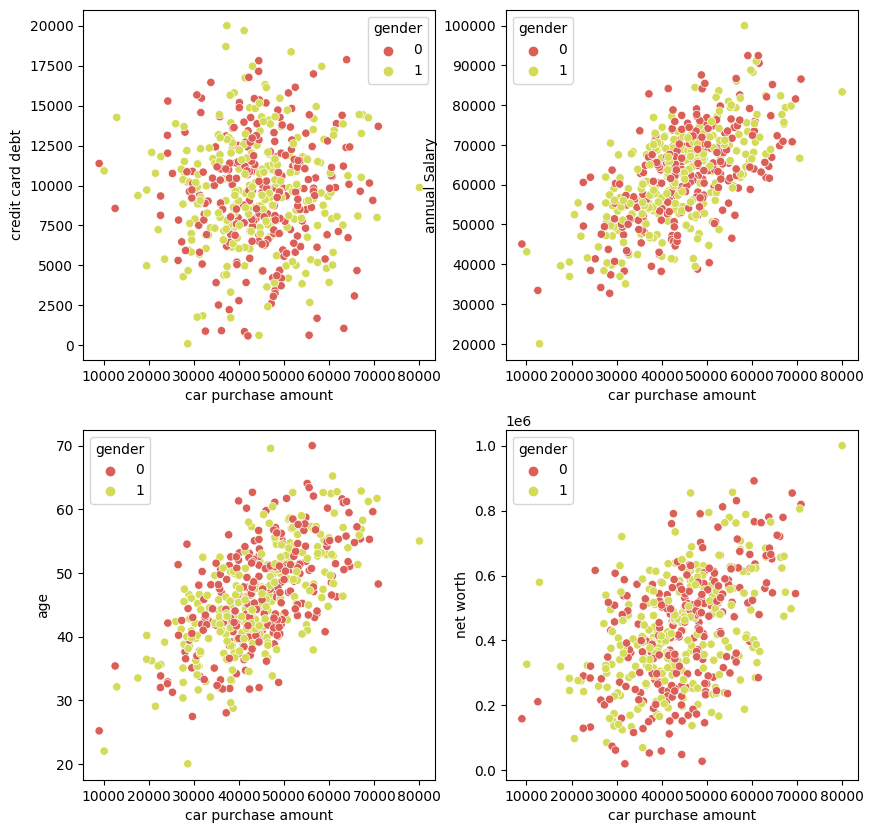

In [59]:
fig , ax = plt.subplots(2,2 , figsize = (10 , 10))
cols = ['credit card debt', 'age' , 'annual Salary' , 'net worth']
for i in range(4):
    sb.scatterplot( x = 'car purchase amount' , y = cols[i] , data = df , ax = ax[i%2 , i//2], hue = 'gender')

In [69]:
y = df['car purchase amount']
df.drop(columns=['customer name', 'customer e-mail' , 'country' , 'gender' ], inplace=True)


In [70]:
X = df.drop('car purchase amount', axis=1)


### Splitting the Training and Testing Data

In [71]:
# scaling the features in the range [0,1 ]
from  sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1 , 1))

### Building the Model

In [73]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
X_train

array([[0.5919433 , 0.28041933, 0.36359421, 0.37352798],
       [0.61344528, 0.64901813, 0.31429008, 0.15276966],
       [0.72431504, 0.46742286, 0.27777908, 0.39982759],
       ...,
       [0.29363923, 0.80213959, 0.63415297, 0.22888834],
       [0.62336278, 0.46847974, 0.10704002, 0.14181603],
       [0.40284696, 0.63935253, 0.39284678, 0.40491578]])

In [75]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))


In [ ]:
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [76]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


### Fitting the model

In [78]:
model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.0711 - mean_absolute_error: 0.2409
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0290 - mean_absolute_error: 0.1393
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0131 - mean_absolute_error: 0.0928
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0125 - mean_absolute_error: 0.0906
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0114 - mean_absolute_error: 0.0869
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0107 - mean_absolute_error: 0.0847
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0103 - mean_absolute_error: 0.0828
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0098 - mean_absolute_error: 0.0807
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0093 - mean_absolute_error: 0.0785
Epoch 10/1

### Model Validation


In [79]:
y_pred = model.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy : ", accuracy * 100, "%" )

4/4 [==============================] - 0s 3ms/step
Accuracy :  99.9428614636395 %
